In [8]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/resources/1weeks/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

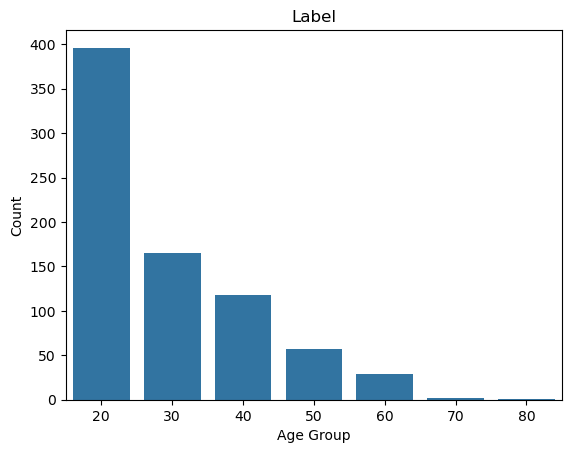

In [78]:
# Age를 10으로 나누어서 새로운 열 생성
df['Age_group'] = (df['Age'] // 10) * 10

# countplot 그리기
sns.countplot(data=df, x="Age_group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Label")

In [17]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_group
0,6,148,72,35,0,33.6,0.627,50,1,50
1,1,85,66,29,0,26.6,0.351,31,0,30
2,8,183,64,0,0,23.3,0.672,32,1,30
3,1,89,66,23,94,28.1,0.167,21,0,20
4,0,137,40,35,168,43.1,2.288,33,1,30
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60
764,2,122,70,27,0,36.8,0.340,27,0,20
765,5,121,72,23,112,26.2,0.245,30,0,30
766,1,126,60,0,0,30.1,0.349,47,1,40


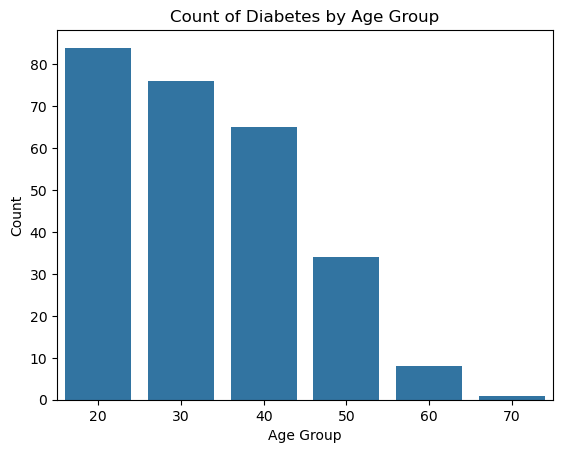

In [18]:
# 나이 그룹 별 Outcome 확인

# outCome이 1인 데이터 그룹 생성
df_outcome_1 = df[df['Outcome'] == 1]

# 나이 그룹 별 Outcome이 1인 countplot 그리기
sns.countplot(data=df_outcome_1, x='Age_group')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title('Count of Diabetes by Age Group')
plt.show()

In [19]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [24]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [26]:
X=df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
0,6,148,72,35,0,33.6,0.627,50,50
1,1,85,66,29,0,26.6,0.351,31,30
2,8,183,64,0,0,23.3,0.672,32,30
3,1,89,66,23,94,28.1,0.167,21,20
4,0,137,40,35,168,43.1,2.288,33,30


In [28]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

#학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
603,7,150,78,29,126,35.2,0.692,54,50
118,4,97,60,23,0,28.2,0.443,22,20
247,0,165,90,33,680,52.3,0.427,23,20
157,1,109,56,21,135,25.2,0.833,23,20
468,8,120,0,0,0,30.0,0.183,38,30
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,60
192,7,159,66,0,0,30.4,0.383,36,30
629,4,94,65,22,0,24.7,0.148,21,20
559,11,85,74,0,0,30.1,0.300,35,30


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings # 필터 오류를 무시
warnings.filterwarnings('ignore')

In [34]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
#학습
clf_svm.fit(X_train, y_train)

#테스트값을 pred_svm에 저장
pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.78571
[[97 10]
 [23 24]]


In [36]:
from sklearn.linear_model import LogisticRegression

# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)

#학습
clf_lr.fit(X_train, y_train)

#테스트값을 pred_lr에 저장
pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.81818
[[97 10]
 [18 29]]


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

#학습
rf_clf.fit(X_train, y_train)

#테스트값을 pred_rf에 저장
pred_rf = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_rf)))
print (confusion_matrix(y_test, pred_rf))


--- Radom Forest ---
0.78571
[[90 17]
 [16 31]]


In [39]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)

#학습
clf_dt.fit(X_train, y_train)

#테스트값을 pred_dt에 저장
pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.79870
[[89 18]
 [13 34]]


In [40]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#모델 선택 (분류 문제인 경우)
knn_model = KNeighborsClassifier(n_neighbors=5)
#회귀 문제인 경우/ KNeighborsRegressor() /

#모델 학습
knn_model.fit(X_train, y_train)

#예측 수행
y_pred = knn_model.predict(X_test)

#성능 평가 (분류 문제인 경우)
print("\n--- KNN ---")
print ('{:.5f}'.format(accuracy_score(y_test, y_pred)))
print (confusion_matrix(y_test, y_pred))

# 성능 평가 (회귀 문제인 경우)
# mse = mean_squared_error(y_test, y_pred)
# print("평균제곱오차:", mse)


--- KNN ---
0.76623
[[88 19]
 [17 30]]


In [41]:
Y = pd.get_dummies(y).values

In [42]:
X = X.values

In [45]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,  30.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,  30.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,  40.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,  20.   ]])

In [50]:
Y
# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만,
# 특정 상황이나 설정에 따라 불리면 값(True/False)으로 표현될 수 있음.

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [52]:
from sklearn.model_selection import train_test_split
#변경된 데이터를 학습용 데이터와 테스트용 데이터 분리
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 

In [54]:
X_train

array([[  9.   ,  89.   ,  62.   , ...,   0.142,  33.   ,  30.   ],
       [  1.   , 118.   ,  58.   , ...,   0.261,  23.   ,  20.   ],
       [  0.   ,  91.   ,  80.   , ...,   0.601,  27.   ,  20.   ],
       ...,
       [  4.   ,  94.   ,  65.   , ...,   0.148,  21.   ,  20.   ],
       [ 11.   ,  85.   ,  74.   , ...,   0.3  ,  35.   ,  30.   ],
       [  5.   , 136.   ,  82.   , ...,   0.64 ,  69.   ,  60.   ]])

In [56]:
y_test.shape

(192, 2)

In [58]:
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

#첫 번째 레이어에선 input_shape 추가 지정
model.add(Dense(15, input_shape=(X_train.shape[1], ), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid')) #출력 유닛 수는 레이블 수와 같아야 한다

model.compile(optimizer=Adam(learning_rate=0.02), loss='bce', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390 (1.52 KB)

 Trainable params: 390 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
#모델 학습
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) #arg: 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5944 - loss: 3.1543 - val_accuracy: 0.3229 - val_loss: 0.7222
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3993 - loss: 0.7060 - val_accuracy: 0.6771 - val_loss: 0.6798
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6545 - loss: 0.6745 - val_accuracy: 0.6771 - val_loss: 0.6492
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6586 - loss: 0.6529 - val_accuracy: 0.6771 - val_loss: 0.6376
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6261 - loss: 0.6609 - val_accuracy: 0.6771 - val_loss: 0.6341
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6387 - loss: 0.6544 - val_accuracy: 0.6771 - val_loss: 0.6326
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6405 - loss: 0.6533 - val_accuracy: 0.6771 - val_loss: 0.6319
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6569 - loss: 0.6437 - val_accuracy: 0.6771 - val_loss

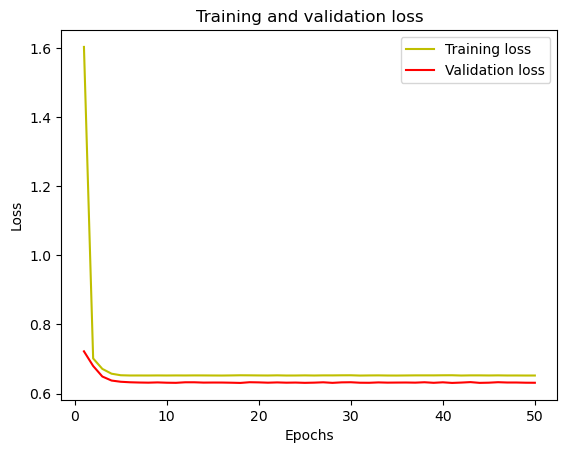

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

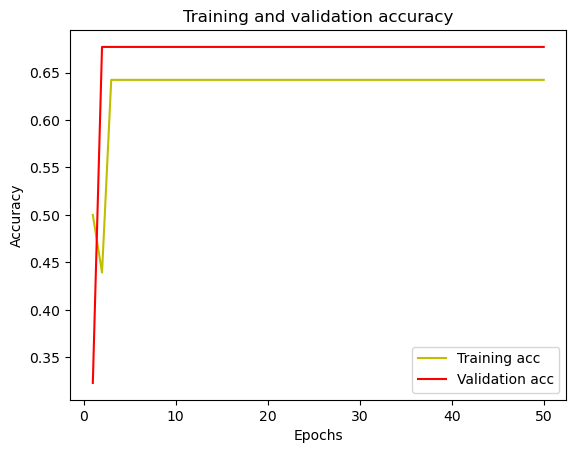

In [64]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
#예측값의 정확도 확인
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192

[[130   0]
 [ 62   0]]


In [88]:
df = df.drop('Outcome', axis = 1)

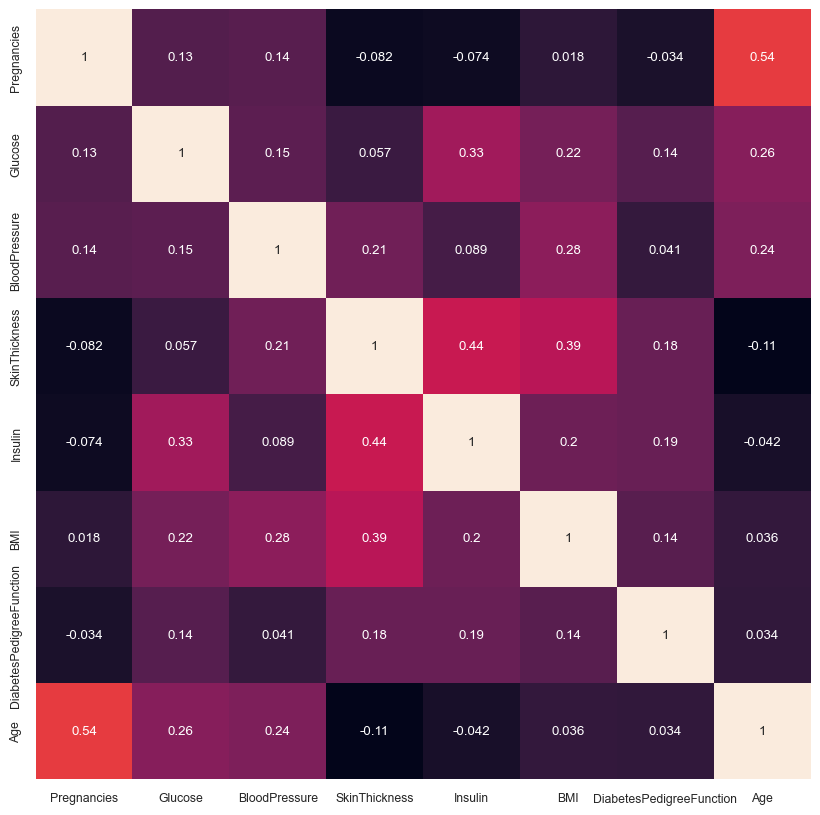

In [96]:
df_corr = df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()
#BMI와 관계가 높은 건 SkinThickness

In [98]:
X=df.drop('BMI', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [100]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 7) (614,)
(154, 7) (154,)


In [110]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 49.07251213392975


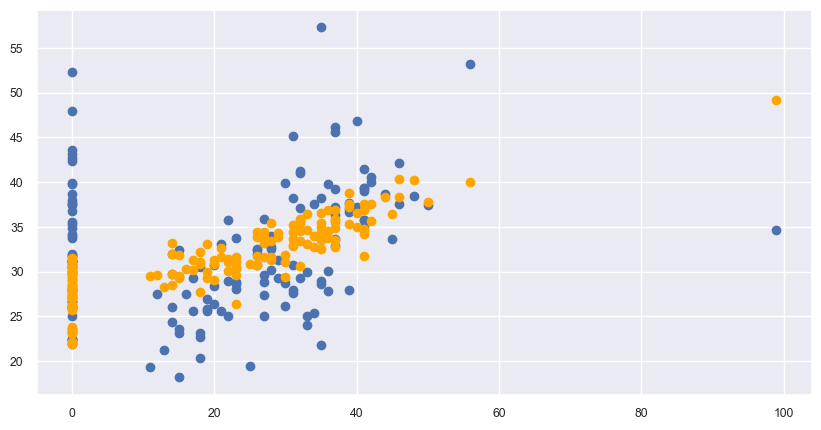

In [114]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()    

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 51.57886634430023
평균제곱근오차 51.57886634430023
평균제곱근오차 51.578866344300216


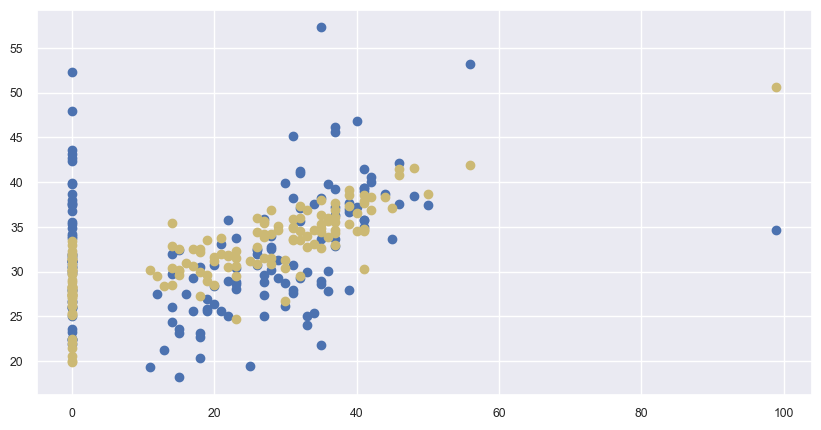

In [118]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()   

In [120]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 42.84633661038961


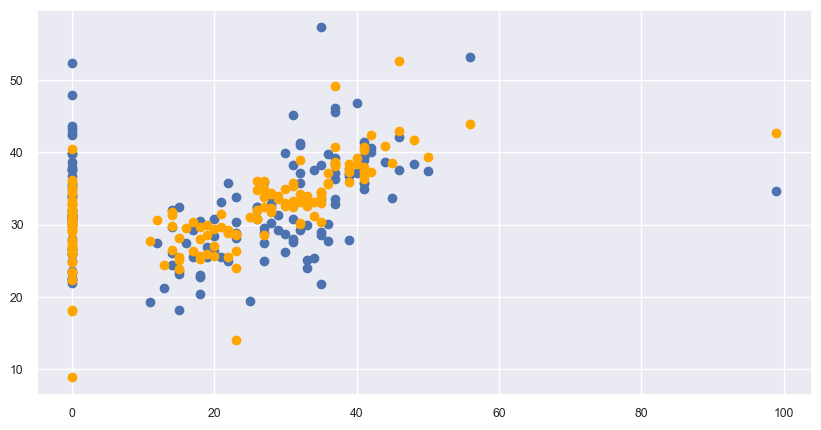

In [122]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], ry_preds, c='orange', label='ry_preds')

plt.show()         

In [124]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 95.33584415584416


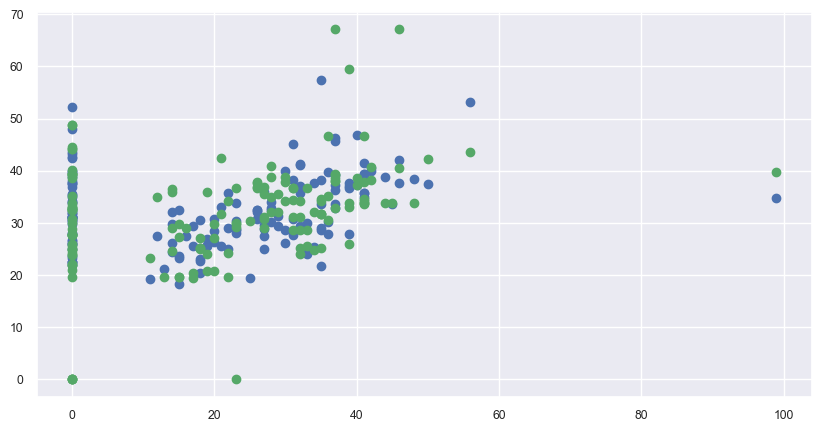

In [126]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='dy_preds')
plt.show()         

In [128]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# 모델 선택 (회귀 문제인 경우)
knn_model = KNeighborsRegressor(n_neighbors=5)

# 모델 학습
knn_model.fit(X_train, y_train)

# 예측 수행
y_pred = knn_model.predict(X_test)

# 성능 평가 (회귀 문제인 경우)
mse = mean_squared_error(y_test, y_pred)
print("평균제곱오차:", mse)

평균제곱오차: 43.73737662337661


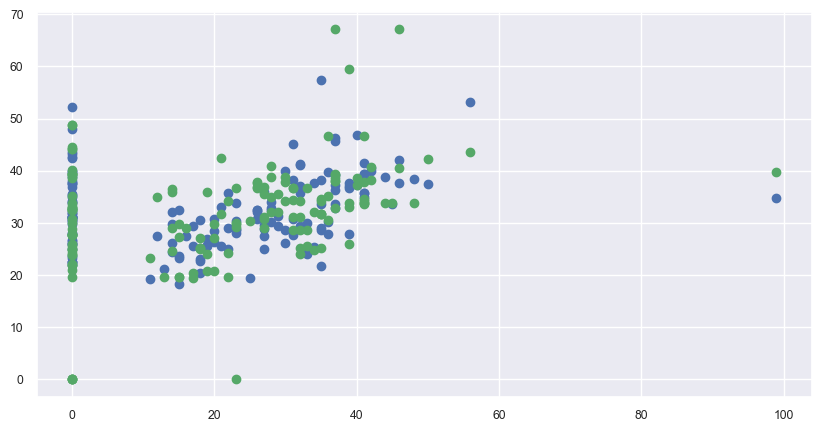

In [130]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['SkinThickness'], y_test, label='y_test')
plt.scatter(X_test['SkinThickness'], dy_preds, c='g', label='y_preds')
plt.show()    